In [1]:
!pip install opendatasets

In [2]:
!pip install prophet

In [3]:
import opendatasets as od
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [5]:
od.download('https://www.kaggle.com/datasets/varpit94/amazon-stock-data')

Skipping, found downloaded files in "./amazon-stock-data" (use force=True to force download)


In [16]:
data=pd.read_csv('/content/amazon-stock-data/AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


In [18]:
test_data=data.tail(30)

In [19]:
data=data.head(len(data)-30)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6227 entries, 0 to 6226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6227 non-null   object 
 1   Open       6227 non-null   float64
 2   High       6227 non-null   float64
 3   Low        6227 non-null   float64
 4   Close      6227 non-null   float64
 5   Adj Close  6227 non-null   float64
 6   Volume     6227 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 340.7+ KB


In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6.227000e+03
mean,553.086480,559.203520,546.308741,552.895347,552.895347,7.288261e+06
std,904.026464,913.543028,893.252839,903.372704,903.372704,7.120764e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.955000,39.674999,38.279999,38.990000,38.990000,3.547900e+06
50%,95.910004,97.820000,94.230003,95.625000,95.625000,5.438200e+06
75%,570.380005,578.725006,561.519989,571.265015,571.265015,8.255050e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


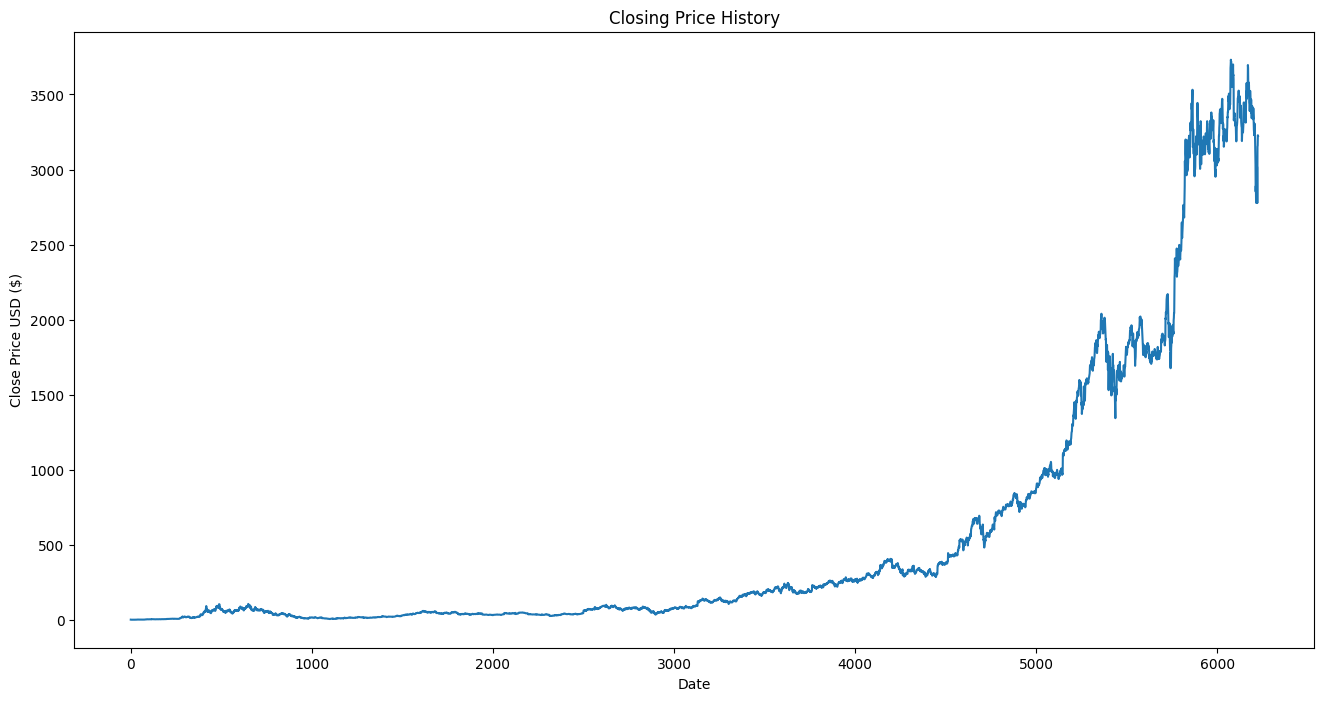

In [22]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [23]:
new_df=pd.DataFrame(data,columns=['Date','Close'])
new_df

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6222,2022-02-03,2776.909912
6223,2022-02-04,3152.790039
6224,2022-02-07,3158.709961
6225,2022-02-08,3228.270020


In [25]:
new_df=new_df.rename(columns={'Date':'ds','Close':'y'})
new_df

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6222,2022-02-03,2776.909912
6223,2022-02-04,3152.790039
6224,2022-02-07,3158.709961
6225,2022-02-08,3228.270020


In [26]:
m=Prophet()
m.fit(new_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmply810dwq/o459j2ie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmply810dwq/uwhi5pb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2442', 'data', 'file=/tmp/tmply810dwq/o459j2ie.json', 'init=/tmp/tmply810dwq/uwhi5pb8.json', 'output', 'file=/tmp/tmply810dwq/prophet_model5w5rz98t/prophet_model-20250603153119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
forecast=m.make_future_dataframe(periods=30)
future=m.predict(forecast)

In [29]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-05-15,-9.571701,-168.230750,148.463245,-9.571701,-9.571701,-2.656916,-2.656916,-2.656916,-1.575088,-1.575088,-1.575088,-1.081829,-1.081829,-1.081829,0.0,0.0,0.0,-12.228617
1,1997-05-16,-9.482147,-168.780702,143.156753,-9.482147,-9.482147,-5.543075,-5.543075,-5.543075,-3.632093,-3.632093,-3.632093,-1.910982,-1.910982,-1.910982,0.0,0.0,0.0,-15.025222
2,1997-05-19,-9.213484,-181.313963,151.856723,-9.213484,-9.213484,-7.416869,-7.416869,-7.416869,-3.686852,-3.686852,-3.686852,-3.730016,-3.730016,-3.730016,0.0,0.0,0.0,-16.630352
3,1997-05-20,-9.123930,-184.872947,140.474738,-9.123930,-9.123930,-5.655854,-5.655854,-5.655854,-1.571048,-1.571048,-1.571048,-4.084805,-4.084805,-4.084805,0.0,0.0,0.0,-14.779783
4,1997-05-21,-9.034375,-175.303572,149.168095,-9.034375,-9.034375,-5.398445,-5.398445,-5.398445,-1.092179,-1.092179,-1.092179,-4.306266,-4.306266,-4.306266,0.0,0.0,0.0,-14.432820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,2022-03-07,3583.937851,3392.156148,3718.852913,3583.937851,3583.937851,-29.647446,-29.647446,-29.647446,-3.686852,-3.686852,-3.686852,-25.960594,-25.960594,-25.960594,0.0,0.0,0.0,3554.290405
6253,2022-03-08,3585.470441,3384.318994,3720.719420,3585.470441,3585.470441,-28.423770,-28.423770,-28.423770,-1.571048,-1.571048,-1.571048,-26.852722,-26.852722,-26.852722,0.0,0.0,0.0,3557.046671
6254,2022-03-09,3587.003031,3395.793209,3720.845019,3587.003031,3587.003031,-28.744709,-28.744709,-28.744709,-1.092179,-1.092179,-1.092179,-27.652530,-27.652530,-27.652530,0.0,0.0,0.0,3558.258322
6255,2022-03-10,3588.535622,3395.110060,3724.971230,3588.535622,3588.535622,-29.929229,-29.929229,-29.929229,-1.575088,-1.575088,-1.575088,-28.354142,-28.354142,-28.354142,0.0,0.0,0.0,3558.606392


In [30]:
future_preds=future.tail(30)
future_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6227,2022-02-10,3545.623092,3372.899563,3679.029208,3545.623092,3545.623092,-16.995743,-16.995743,-16.995743,-1.575088,-1.575088,-1.575088,-15.420655,-15.420655,-15.420655,0.0,0.0,0.0,3528.627350
6228,2022-02-11,3547.155683,3368.079544,3693.867228,3547.155683,3547.155683,-17.869563,-17.869563,-17.869563,-3.632093,-3.632093,-3.632093,-14.237470,-14.237470,-14.237470,0.0,0.0,0.0,3529.286120
6229,2022-02-12,3548.688273,3380.635385,3699.953487,3548.688273,3548.688273,-7.409245,-7.409245,-7.409245,5.778630,5.778630,5.778630,-13.187876,-13.187876,-13.187876,0.0,0.0,0.0,3541.279028
6230,2022-02-13,3550.220863,3375.325273,3703.835298,3550.220863,3550.220863,-6.509127,-6.509127,-6.509127,5.778630,5.778630,5.778630,-12.287757,-12.287757,-12.287757,0.0,0.0,0.0,3543.711736
6231,2022-02-14,3551.753454,3375.701872,3693.095209,3551.753454,3551.753454,-15.236925,-15.236925,-15.236925,-3.686852,-3.686852,-3.686852,-11.550073,-11.550073,-11.550073,0.0,0.0,0.0,3536.516528
6232,2022-02-15,3553.286044,3372.334468,3705.761163,3553.286044,3553.286044,-12.555689,-12.555689,-12.555689,-1.571048,-1.571048,-1.571048,-10.984641,-10.984641,-10.984641,0.0,0.0,0.0,3540.730355
6233,2022-02-16,3554.818634,3383.409469,3710.561832,3554.818634,3554.818634,-11.690170,-11.690170,-11.690170,-1.092179,-1.092179,-1.092179,-10.597991,-10.597991,-10.597991,0.0,0.0,0.0,3543.128465
6234,2022-02-17,3556.351225,3377.376155,3702.350098,3556.351225,3556.351225,-11.968383,-11.968383,-11.968383,-1.575088,-1.575088,-1.575088,-10.393296,-10.393296,-10.393296,0.0,0.0,0.0,3544.382841
6235,2022-02-18,3557.883815,3372.826138,3714.780166,3557.883815,3557.883815,-14.002470,-14.002470,-14.002470,-3.632093,-3.632093,-3.632093,-10.370378,-10.370378,-10.370378,0.0,0.0,0.0,3543.881345
6236,2022-02-19,3559.416405,3398.843133,3710.742690,3559.416405,3559.416405,-4.747156,-4.747156,-4.747156,5.778630,5.778630,5.778630,-10.525786,-10.525786,-10.525786,0.0,0.0,0.0,3554.669250


In [31]:
preds=future_preds[['yhat']]
preds

,yhat
6227,3528.627350
6228,3529.286120
6229,3541.279028
6230,3543.711736
6231,3536.516528
6232,3540.730355
6233,3543.128465
6234,3544.382841
6235,3543.881345
6236,3554.669250


In [32]:
test_data['Close']

,Close
6227,3180.070068
6228,3065.870117
6229,3103.340088
6230,3130.209961
6231,3162.010010
6232,3093.050049
6233,3052.030029
6234,3003.949951
6235,2896.540039
6236,3027.159912


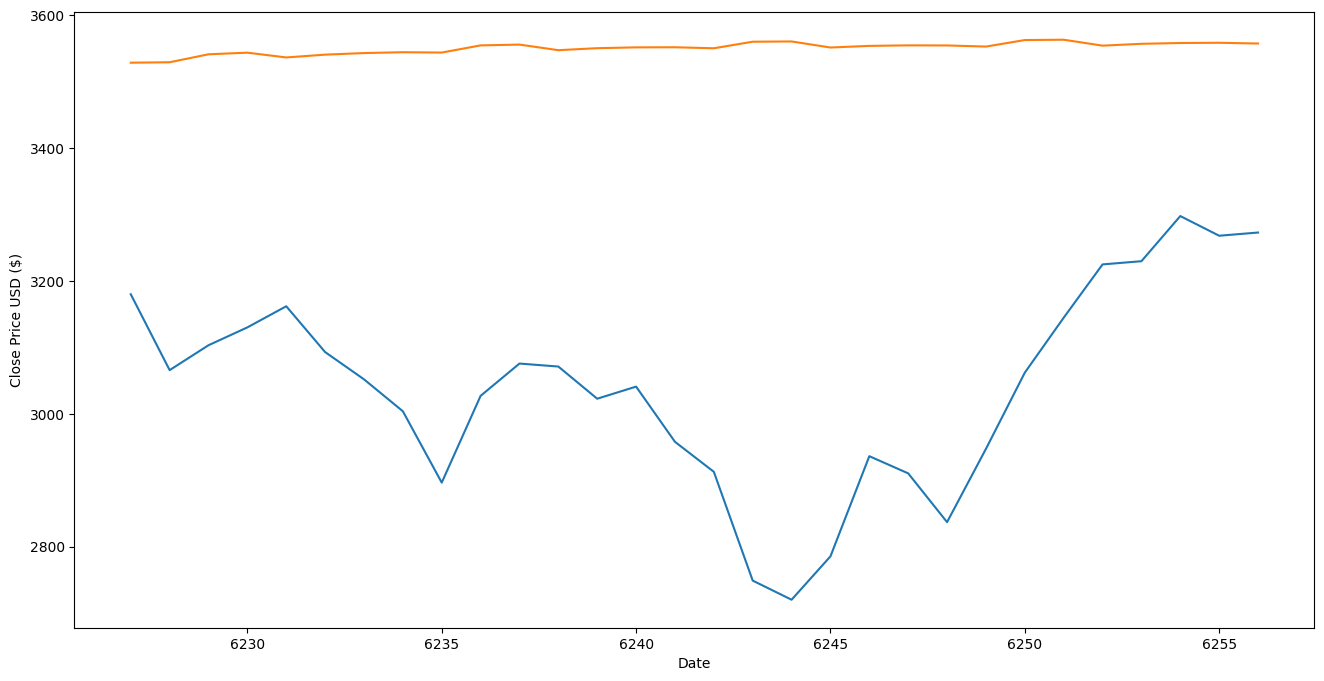

In [34]:
plt.figure(figsize=(16,8))
plt.plot(test_data['Close'])
plt.plot(preds)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()